
#**Cox Proportional Hazard Model**

The time to event for an individual in the population is very important for the survival curves at the aggregate level; however, in real life situations along with the event data we also have the covariates (features) of that individual. In such cases, it is very important to know about the impact of covariates on the survival curve. This would help us in predicting the survival probability of an individual, if we know the associated covariates values.
For example, in the telco-churn example discussed above, we have each customer’s tenure when they churned (the event time T) and the customer’s Gender, MonthlyCharges, Dependants, Partner, PhoneService etc. The other variables are the covariates in this example. We are often interested in how these covariates impacts the survival probability function.
In such cases, it is the conditional survival function $S(t|x) = P(T > t|x)$. Here $x$ denotes the covariates. In our example, we are interested in $S(tenure > t|(Gender, MonthlyCharges, Dependants, Partner, PhoneService etc))$.
The Cox (proportional hazard) model is one of the most popular model combining the covariates and the survival function. It starts with modeling the hazard function.

$$h(t|X=x)=h_0(t)e^{X^T\beta}$$

Here, $β$ is the vector of coeﬃcients of each covariate. The function $h_o(t)$ is called the baseline hazard function.
The Cox model assumes that the covariates have a linear multiplication eﬀect on the hazard function and the eﬀect stays the same across time.
The idea behind the model is that the log-hazard of an individual is a linear function of their static covariates, and a population-level baseline hazard that changes over time. [Source: lifelines documentation](https://lifelines.readthedocs.io/en/latest/Quickstart.html)
From the above equation we can also derive cumulative conditional hazard function as below:

As we are already aware that we can derive survival function from the hazard function.

#**Basic implementation in python**

We will now discuss about its basic implementation in python with the help of lifelines package. We have used the same telco-customer-churn data-set, which we have been using in the above sections. We will run a python code for predicting the survival function at customer level.

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/dcu/future Learn_v2/MOOC 5 - CA683 - Point Estimation and Future Impact Calculation/M5 Colab Files/Data")
!ls

Mounted at /content/drive
calories.csv			  poisson_predictions.csv
exercise.csv			  SN_m_tot_V2.0.csv
nyc_bb_bicyclist_counts.csv	  student_mat.csv
nyc_bb_bicyclist_counts_test.csv  Telco-Customer-Churn.csv


In [3]:
!pip install imgaug=='0.2.6'
!pip install lifelines

     |████████████████████████████████| 631 kB 13.5 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=c0541eb8aaac4a23b71b82ca77bb6dd7147b2354f2b0d5eafe37422b273ae550
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes  

##  create a dataframe
df = pd.read_csv("Telco-Customer-Churn.csv")

## Have a first look at the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The objective here is to introduce you to the implementation of the model. For the purposes of demonstation we use a subset of features from the dataset.

In [5]:
from lifelines import CoxPHFitter


df_r= df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_r.head() ## have a look at the data

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,No,Female,Yes,No,No,29.85,0,No
1,34,No,Male,No,No,Yes,56.95,0,No
2,2,Yes,Male,No,No,Yes,53.85,0,No
3,45,No,Male,No,No,No,42.30,0,No
4,2,Yes,Female,No,No,Yes,70.70,0,No


In [6]:
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,MonthlyCharges,SeniorCitizen,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,29.85,0,0,0,1,0,0,0,0
1,34,56.95,0,0,1,0,0,1,0,0
2,2,53.85,0,1,1,0,0,1,0,0
3,45,42.30,0,0,1,0,0,0,0,0
4,2,70.70,0,1,0,0,0,1,0,0


We can no estimate the impact of each feature in the churn of customers using the CoxPhFitter object.

In [7]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'tenure', event_col='Churn_Yes')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15182.39
         time fit was run = 2022-03-27 15:12:09 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
MonthlyCharges                   -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
SeniorCitizen                     0.40       1.49       0.06             0.29             0.50                 1.33                 1.66
gender_Male                      -0.01       0.99       0.05            -0.10             0.08                 0.90                 1.08
Partner_Yes                      -0.81       0.45       0.05            -0.92            -0.70                 0.40                 0.50
Dependents_Yes                   -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
PhoneService_Yes                  0.69       2.00       0.10             0.49             0.90                 1.63                 2.45
StreamingTV_No internet service  -2.10       0.12       0.13            -2.36            -1.84                 0.09                 0.16
StreamingTV_Yes                  -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93

                                  cmp to      z      p   -log2(p)
covariate                                                        
MonthlyCharges                      0.00  -6.13 <0.005      30.06
SeniorCitizen                       0.00   7.16 <0.005      40.15
gender_Male                         0.00  -0.23   0.82       0.29
Partner_Yes                         0.00 -14.93 <0.005     164.98
Dependents_Yes                      0.00  -5.21 <0.005      22.37
PhoneService_Yes                    0.00   6.65 <0.005      34.96
StreamingTV_No internet service     0.00 -15.79 <0.005     184.09
StreamingTV_Yes                     0.00  -3.10 <0.005       9.03
---
Concordance = 0.71
Partial AIC = 30380.78
log-likelihood ratio test = 941.30 on 8 df
-log2(p) of ll-ratio test = 654.95

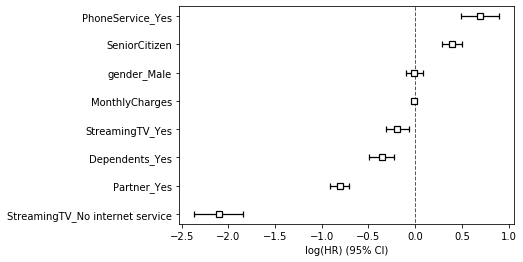

In [ ]:
cph.plot()